# Customer satisfaction prediction

## Dataset structure
| n    | Variable                      | Description                                                  |
| :--- | :---------------------------- | :----------------------------------------------------------- |
| 1    | id                            | Client ID                                                    |
| 2    | Gender                        | Client Gender                                                |
| 3    | Customer type                 | Client type: Premium or Standard                             |
| 4    | Age                           | Client Age                                                   |
| 5    | Price                         | Client Age                                                   |
| 6    | New/Used                      | Client Age                                                   |
| 7    | Category                      | Client Age                                                   |
| 8    | Product description accuracy  | Level of satisfaction on product description                 |
| 9    | Manufacturer stainability     | Level of satisfaction on the manufacturing sustainability process |
| 10   | Packaging quality             | Level of satisfaction on packaging                           |
| 11   | Additional options            | Level of satisfaction on extra options                       |
| 12   | Reviews and ratings           | Level of satisfaction on reviews and rating information      |
| 13   | Integrity of packaging        | Level of satisfaction on packaging state                     |
| 14   | Check-out procedure           | Level of satisfaction on payment procedure                   |
| 15   | Relevance of related products | Level of satisfaction on related product suggestion          |
| 16   | Costumer insurance            | Level of satisfaction on insurance options                   |
| 17   | Shipping delay in days        | Delay of shipping in days                                    |
| 18   | Arrival delay in days         | Arrival delay on days                                        |
| 19   | Satisfaction                  | Target: Satisfied, Not Satisfied                             |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/processed/final.csv', index_col=0)
df.head()
df_for_pca = df.iloc[:,:-1]

***
## Principal components analysis

In [3]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(df_for_pca)

StandardScaler()

In [5]:
df_pca_scaled = scaler.transform(df_for_pca)

In [6]:
pca = PCA()
pca.fit(df_pca_scaled)

PCA()

In [7]:
df_pca = pd.DataFrame(pca.transform(df_pca_scaled))

In [8]:
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
explained_var.columns = ['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
explained_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.189238,0.119045,0.110444,0.093622,0.071782,0.071398,0.068671,0.061559,0.050673,0.045685,0.034568,0.033633,0.02643,0.023251


In [9]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
cum_explained_var = pd.DataFrame(cum_explained_var)
cum_explained_var.columns = ['CUMSUM']
cum_explained_var

,CUMSUM
0,0.189238
1,0.308283
2,0.418727
3,0.512348
4,0.584130
5,0.655529
6,0.724200
7,0.785759
8,0.836432
9,0.882117


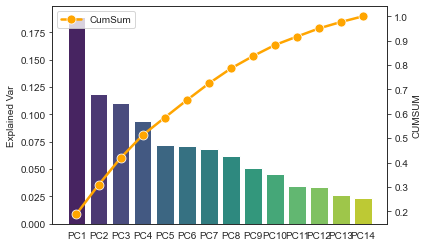

In [10]:
sns.set_style('white')
ax = sns.barplot(data=explained_var, palette = 'viridis')
ax.set_ylabel('Explained Var')
ax2 = plt.twinx()
sns.lineplot(x = cum_explained_var.index, y = 'CUMSUM', data = cum_explained_var, ax = ax2, color = 'orange', marker = 'o', markersize = 9, linewidth = 2.5, label = 'CumSum');
plt.legend()

In [11]:
pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'],columns=df.iloc[:,:-1].columns)

,Age,log_price,log_arrival_delays,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Gender_Male,Customer Type_Premium
PC1,-0.017152,-0.112429,0.029744,-0.093728,-0.006768,-0.159050,-0.467381,-0.364419,-0.478590,-0.290686,-0.483308,-0.219528,0.037738,-0.063689
PC2,-0.267778,-0.154643,0.014641,-0.152662,-0.080053,-0.567041,0.122112,0.104828,0.205367,-0.081391,0.212037,-0.559774,-0.000342,-0.346279
PC3,-0.331771,-0.095105,-0.020521,-0.563654,-0.451039,0.327607,-0.030931,-0.017071,-0.004411,0.009551,-0.001264,0.303178,0.028494,-0.397373
PC4,-0.456808,-0.277889,0.018793,0.378781,0.553437,0.197742,-0.073472,-0.114921,0.041836,-0.003112,0.038112,0.163774,0.046674,-0.417210
PC5,-0.077593,0.188964,0.966108,-0.020332,0.021310,-0.003142,-0.027566,0.131509,0.008670,-0.019872,-0.053402,0.026000,0.043497,-0.009225
PC6,-0.030651,-0.054193,0.045096,-0.013023,0.018171,0.027640,-0.065130,0.025665,0.010230,-0.077466,0.006456,0.013575,-0.990753,-0.001847
PC7,0.387928,-0.856920,0.221490,0.035153,-0.150110,0.023422,0.073507,-0.099145,0.049038,0.139589,0.040266,0.032404,0.025219,0.037348
PC8,0.120052,-0.127555,-0.026392,-0.089035,0.117993,0.155076,0.083372,0.298065,0.095246,-0.891047,0.094448,0.062420,0.083970,0.063448
PC9,-0.157528,0.095967,0.099823,0.097579,-0.180971,0.044530,0.223887,-0.802655,0.226032,-0.248029,0.248930,-0.010177,-0.011877,0.206288
PC10,0.596677,0.231980,0.028165,-0.282703,0.349334,0.001361,0.141376,-0.272786,0.051997,0.013340,0.043559,0.021534,-0.034995,-0.535300


>There is no semantic meaning for new components.

In [12]:
df_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
df_pca = pd.concat([df_pca, df['Satisfaction']], axis = 1)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Satisfaction
0,-0.503676,0.818537,-1.918618,-0.289459,-0.656636,0.949482,1.062721,0.375874,0.387213,0.729860,-0.345190,-0.102104,0.583231,-0.113804,0
1,-2.724281,-0.304545,1.008228,-2.521039,-0.058089,0.804443,-0.489871,0.117833,-0.151225,0.631986,-0.078440,0.161064,0.056013,0.883840,1
2,-1.970200,-1.061656,0.525526,-0.206484,0.084087,1.080329,-1.523752,2.282215,0.379038,-0.148587,0.627534,0.144843,-0.499859,0.117484,1
3,0.498974,-0.866452,-1.733053,0.894393,0.041860,-1.009594,-0.308412,-0.915998,-2.201007,-0.546700,-0.442562,-0.130765,1.717315,-0.290857,0
4,1.947428,-1.628732,2.438007,-0.445281,-0.325856,-0.691621,0.819916,0.970385,-0.226254,-1.217772,-0.912903,-0.042136,0.502437,0.125045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,1.055438,0.454519,1.379840,-1.504150,-0.009982,1.127819,-1.234865,1.296052,0.172125,-1.064262,0.302741,-0.034624,0.080719,0.106981,0
49994,0.261978,-1.132538,1.159889,1.191318,-0.363026,1.369397,0.469123,1.273648,-0.257849,-1.504295,-1.551853,-0.106517,-0.199477,0.156854,0
49995,0.337027,-0.744138,0.639969,0.585843,-0.440598,-0.928826,0.173597,-1.188812,1.852849,-1.531825,-1.924639,1.360748,0.331887,0.030076,0
49996,2.487552,0.028943,-1.259678,0.415079,-0.203661,-0.991982,-0.686792,-0.637198,-0.017999,-0.460371,0.176023,-0.372920,0.129986,1.063390,0


In [14]:
df_pca.to_csv('../data/processed/model_PCA.csv')

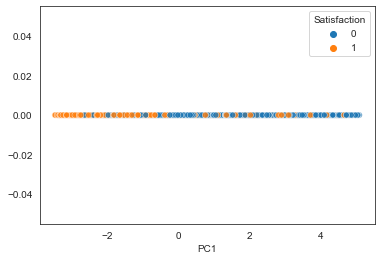

In [15]:
sns.scatterplot(x = 'PC1', y=[0]*(df_pca['Satisfaction'].size), data=df_pca, hue = 'Satisfaction', alpha = .8);

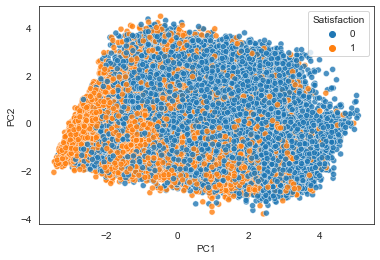

In [16]:
sns.scatterplot(x = 'PC1', y = 'PC2', data=df_pca, hue = 'Satisfaction', alpha = .8);

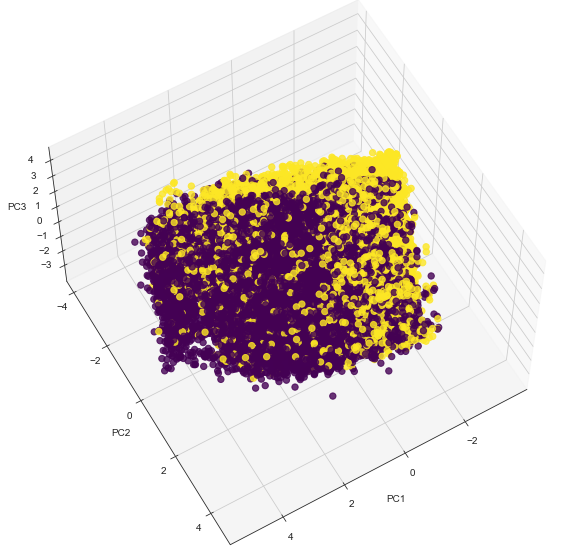

In [21]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'],df_pca['PC3'], c=df_pca['Satisfaction'], cmap = 'viridis', s=40, alpha = .8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(60, 60)
plt.show()